In [2]:
%matplotlib inline

# import utility libraries
import os
import subprocess
from os.path import isfile, join

# import data manip libraries
import numpy as np
import pandas as pd

# import language processing libraries
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# import data visualization libraries
import matplotlib.pyplot as plt

# set up data directory name
DATA_DIR = os.getcwd() + "/data/1892-1919"

# NOTE: This Jupyter Notebook should always reside in root dir

/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
""" set up .pdf data conversion 
    skip these next two cells if .txt information already extracted
"""
# search for all files in data directory with given extension, add to list of file_names
def file_searcher(ext, directory):
    file_names = []
    for file in os.listdir(directory):
        if file.endswith(ext):
            file_names.append(os.path.join(directory, file))
    return file_names

# list of of filenames to be processed
file_names = file_searcher(".pdf", DATA_DIR)

In [4]:
# convert .pdf files to .txt files 
def convert(files):
    for item in files:
        item_txt = item.split(".")[0] + ".txt"
        subprocess.call(["python3", os.getcwd() + "/data/pdf2txt.py", item, "-o", item_txt])

In [10]:
"""
    process .txt files and execute autocorrect
    skip this cell if .txt information already preprocessed
"""
txt_file_names = file_searcher(".txt", DATA_DIR)
txt_file_names.sort()

def preprocess(files):
    for item in files:
        item_name = item.split(".")[0]
        subprocess.call(["python3", os.getcwd() + "/utils/autocorrecter.py", item_name])
preprocess(txt_file_names)

In [15]:
final_txt_names = []
for file in txt_file_names:
    final_txt_names.append(file.split(".")[0] + "Revised.txt")

In [16]:
sentiment = SentimentIntensityAnalyzer()
scores = []

for file in final_txt_names:
    sub_scores = []
    with open(file) as f:
        text = f.read()
        scores.append(sentiment.polarity_scores(text))
scores

[{'compound': 0.9988, 'neg': 0.062, 'neu': 0.858, 'pos': 0.08},
 {'compound': -0.9993, 'neg': 0.097, 'neu': 0.815, 'pos': 0.087},
 {'compound': -0.9241, 'neg': 0.075, 'neu': 0.849, 'pos': 0.076},
 {'compound': 0.9999, 'neg': 0.06, 'neu': 0.833, 'pos': 0.107},
 {'compound': 0.9889, 'neg': 0.099, 'neu': 0.799, 'pos': 0.102},
 {'compound': 0.9982, 'neg': 0.074, 'neu': 0.843, 'pos': 0.083},
 {'compound': 1.0, 'neg': 0.07, 'neu': 0.822, 'pos': 0.108},
 {'compound': 1.0, 'neg': 0.055, 'neu': 0.811, 'pos': 0.134},
 {'compound': 0.9988, 'neg': 0.09, 'neu': 0.807, 'pos': 0.103},
 {'compound': 0.9998, 'neg': 0.074, 'neu': 0.823, 'pos': 0.104},
 {'compound': -0.7513, 'neg': 0.084, 'neu': 0.833, 'pos': 0.083},
 {'compound': 0.9961, 'neg': 0.038, 'neu': 0.895, 'pos': 0.066},
 {'compound': 0.9988, 'neg': 0.067, 'neu': 0.85, 'pos': 0.082},
 {'compound': -0.9957, 'neg': 0.088, 'neu': 0.833, 'pos': 0.079},
 {'compound': -0.9986, 'neg': 0.097, 'neu': 0.815, 'pos': 0.088},
 {'compound': 0.9993, 'neg': 0.

In [18]:
df = pd.DataFrame(scores)
df['source'] = txt_file_names 

dates = []
for file in txt_file_names:
    date = (file.split(".")[0])[-9:]
    dates.append(date)
    
df['dates'] = dates
df

,compound,neg,neu,pos,source,dates
0,0.9988,0.062,0.858,0.080,/Users/kernel-ares/Desktop/zanzibar research/z...,1892-0224
1,-0.9993,0.097,0.815,0.087,/Users/kernel-ares/Desktop/zanzibar research/z...,1893-0308
2,-0.9241,0.075,0.849,0.076,/Users/kernel-ares/Desktop/zanzibar research/z...,1894-0307
3,0.9999,0.060,0.833,0.107,/Users/kernel-ares/Desktop/zanzibar research/z...,1895-0306
4,0.9889,0.099,0.799,0.102,/Users/kernel-ares/Desktop/zanzibar research/z...,1896-0304
5,0.9982,0.074,0.843,0.083,/Users/kernel-ares/Desktop/zanzibar research/z...,1897-0303
6,1.0000,0.070,0.822,0.108,/Users/kernel-ares/Desktop/zanzibar research/z...,1898-0302
7,1.0000,0.055,0.811,0.134,/Users/kernel-ares/Desktop/zanzibar research/z...,1899-0308
8,0.9988,0.090,0.807,0.103,/Users/kernel-ares/Desktop/zanzibar research/z...,1900-0307
9,0.9998,0.074,0.823,0.104,/Users/kernel-ares/Desktop/zanzibar research/z...,1901-0306


Text(0.5,0,'date')

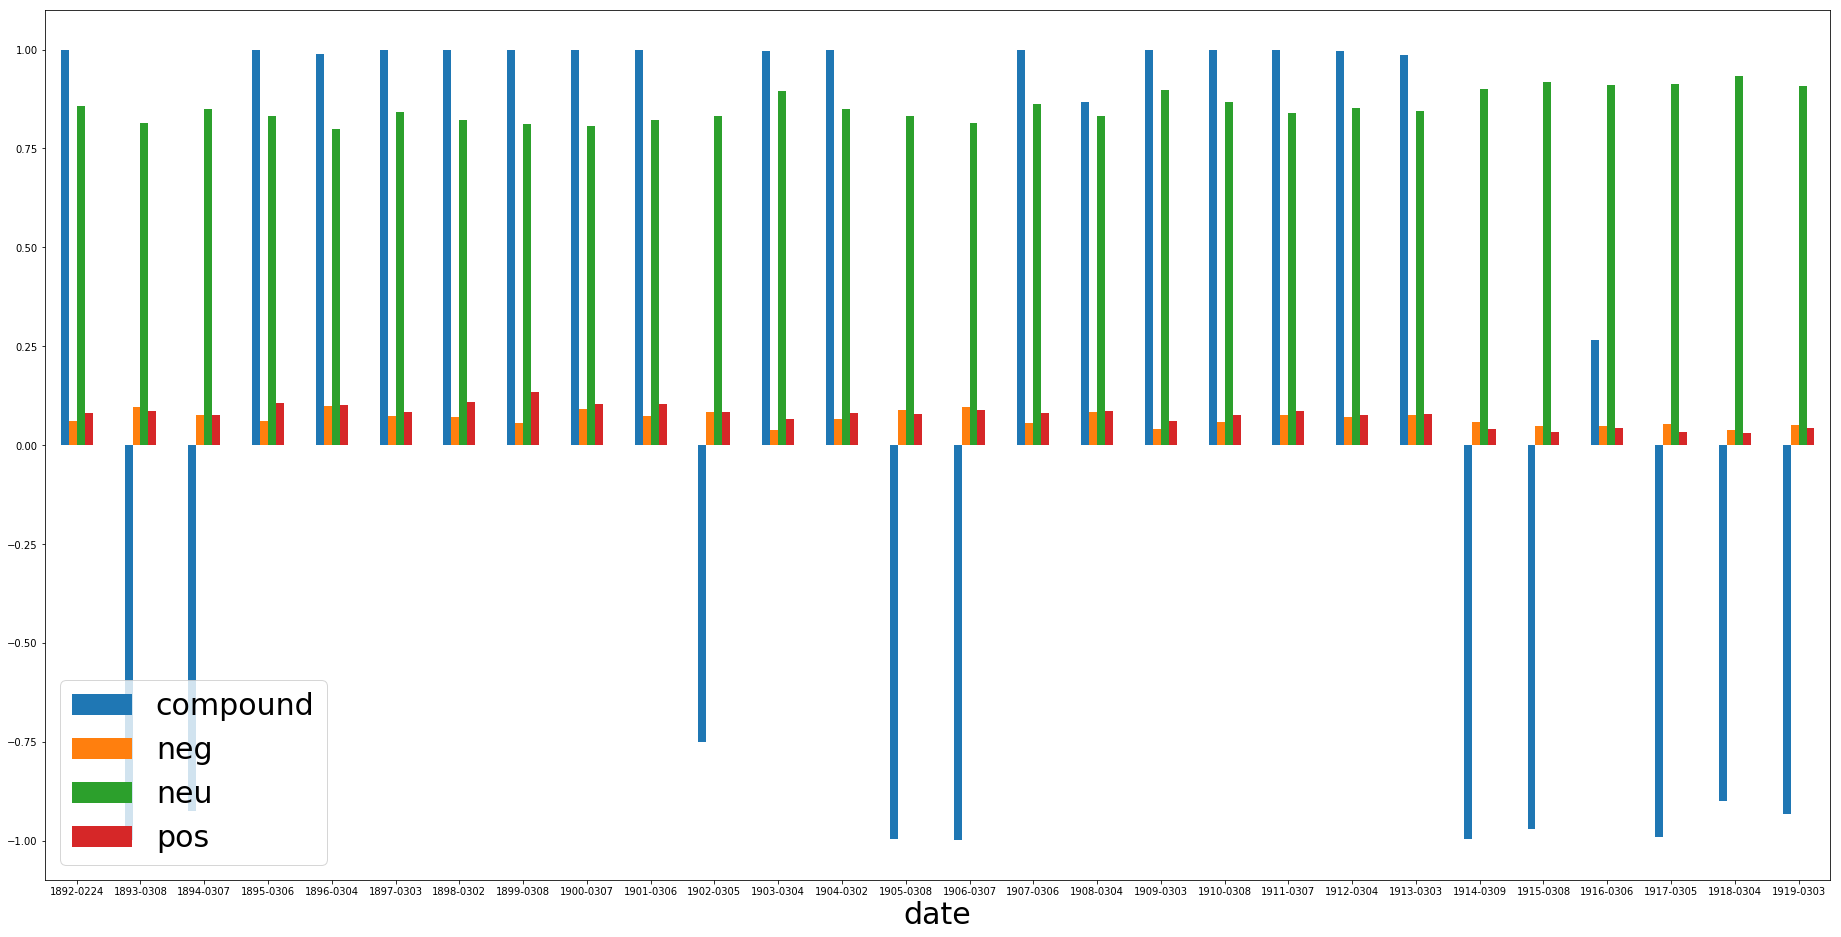

In [19]:
df.plot(kind='bar', figsize=(32, 16))
plt.legend(prop={'size': 30})
plt.xticks(np.arange(df.shape[0]), dates, rotation=0, size=10);
plt.xlabel('date', size=30)